In [22]:
"""
Reference: https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
Dataset: http://archive.ics.uci.edu/ml/index.php
"""

import pandas as pd #data processing
import numpy as np #linear algebra
import matplotlib.pyplot as plt #data visualization
import seaborn as sns #data visualization
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
import warnings
from sklearn.metrics import confusion_matrix
from yellowbrick.classifier import ConfusionMatrix

warnings.filterwarnings("ignore") #ignore warnings

In [2]:
data = pd.read_csv('bank.csv')
data.dropna() #Remove missing values
print(data.shape) #rows, columns
print(list(data.columns)) #features

(22661, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [3]:
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0.0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0.0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1.0
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0.0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1.0
5,30,management,divorced,basic.4y,no,yes,no,cellular,jul,tue,...,8,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0.0
6,37,blue-collar,married,basic.4y,no,yes,no,cellular,may,thu,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,0.0
7,39,blue-collar,divorced,basic.9y,no,yes,no,cellular,may,fri,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0.0
8,36,admin.,married,university.degree,no,no,no,cellular,jun,mon,...,1,3,1,success,-2.9,92.963,-40.8,1.266,5076.2,1.0
9,27,blue-collar,single,basic.4y,no,yes,no,cellular,apr,thu,...,2,999,1,failure,-1.8,93.075,-47.1,1.410,5099.1,0.0


In [4]:
#Reducing the number of categories in order to do a better modelling
print(data['education'].unique()) #find the unique elements of an array
#numpy.where(condition[, x, y]): Return elements chosen from x or y depending on condition.
data['education'] = np.where(data['education'] == 'basic.4y', 'basic', data['education'])
data['education'] = np.where(data['education'] == 'basic.9y', 'basic', data['education'])
data['education'] = np.where(data['education'] == 'basic.6y', 'basic', data['education'])

#After reducing the categories
print(data['education'].unique())

['basic.4y' 'unknown' 'university.degree' 'high.school' 'basic.9y'
 'professional.course' 'basic.6y' 'illiterate']
['basic' 'unknown' 'university.degree' 'high.school' 'professional.course'
 'illiterate']


In [5]:
data['y'] #target; predict variable

0        0.0
1        0.0
2        1.0
3        0.0
4        1.0
        ... 
22656    0.0
22657    0.0
22658    0.0
22659    0.0
22660    NaN
Name: y, Length: 22661, dtype: float64

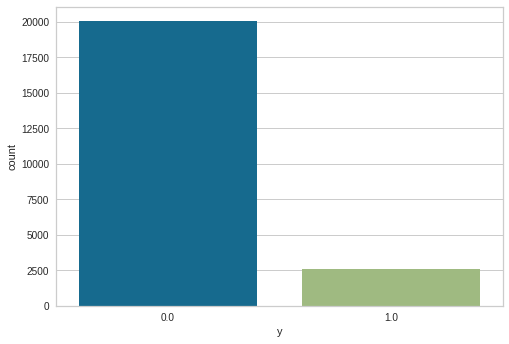

Subscription rate: 11.46%
No Subscription rate: 88.54%


In [6]:
sns.countplot(x='y', data=data) #Show the counts of observations in each categorical bin using bars
plt.show()

subscription_number = len(data[data['y']==1])
no_subscription_number = len(data[data['y']==0])
subscription_rate = subscription_number/(subscription_number+no_subscription_number)
no_subscription_rate = no_subscription_number/(subscription_number+no_subscription_number)
print("Subscription rate: {:.2f}%".format(subscription_rate*100))
print("No Subscription rate: {:.2f}%".format(no_subscription_rate*100))

In [7]:
#groupby: Group DataFrame using a mapper or by a Series of columns
#groupby.mean(): Compute mean of groups, excluding missing values.
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0.0,39.928276,219.967453,2.631012,984.952799,0.134177,0.248044,93.607099,-40.579360,3.808916,5175.941265
1.0,40.862149,552.507509,2.011937,788.666153,0.493261,-1.221332,93.372729,-39.897151,2.123265,5094.806739


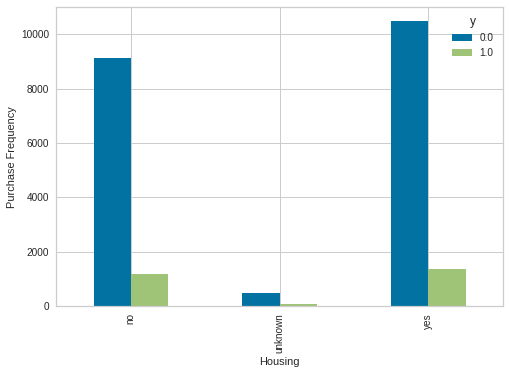

In [8]:
pd.crosstab(data.housing, data.y).plot(kind='bar')
plt.xlabel('Housing')
plt.ylabel('Purchase Frequency')
plt.show()

#Housing does not seem to be a strong predictor for the outcome variable

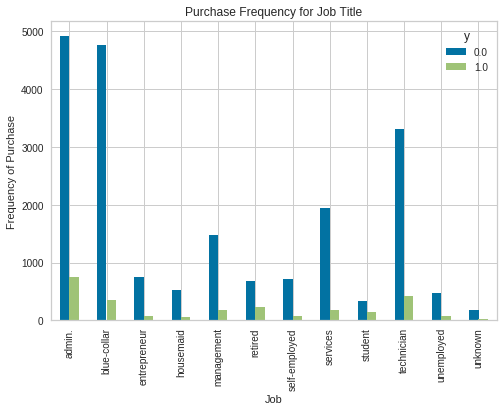

In [9]:
#The pandas crosstab function builds a cross-tabulation table that can show the frequency with which certain 
#groups of data appear
pd.crosstab(data.job, data.y).plot(kind='bar') 
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.show()

#Job title seems to be a strong predictor for the outcome variable

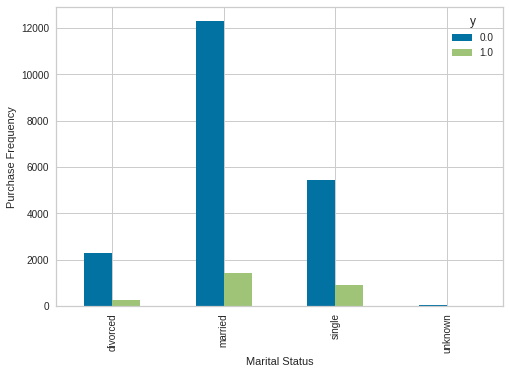

In [10]:
pd.crosstab(data.marital, data.y).plot(kind='bar')
plt.xlabel('Marital Status')
plt.ylabel('Purchase Frequency')
plt.show()

#Marital status seems to be a strong predictor for the outcome variable

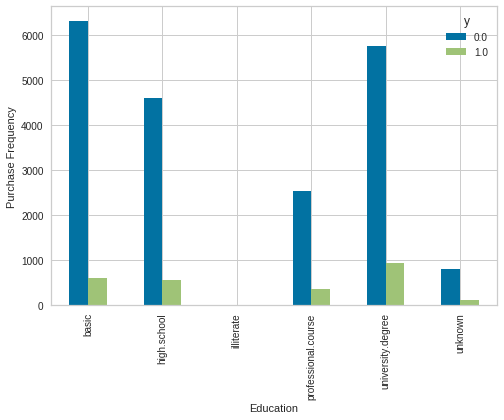

In [11]:
pd.crosstab(data.education, data.y).plot(kind='bar')
plt.xlabel('Education')
plt.ylabel('Purchase Frequency')
plt.show()

#Education seems to be a strong predictor for the outcome variable

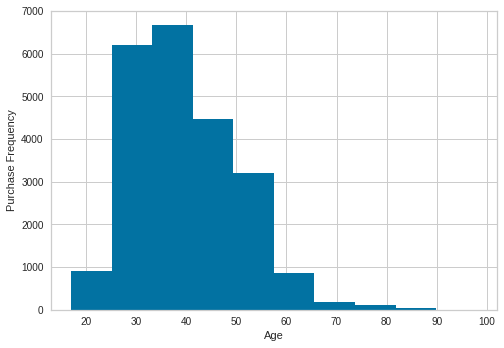

In [12]:
data.age.hist() #histogram
plt.xlabel('Age')
plt.ylabel('Purchase Frequency')
plt.show()

#Mostly between 30 and 40 years old

In [13]:
#Pandas has a function (get_dummies) which can turn a categorical variable into a numerical variable 
#(also called dummy variables), which makes them #easier to quantify and compare. Dummy variables are useful
#because they enable us to use a single regression equation to represent multiple groups.
features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month',
           'contact', 'day_of_week', 'poutcome']
for variable in features:
    features = 'variable'+'_'+variable
    features = pd.get_dummies(data[variable], prefix=variable)
    data_temp = data.join(features)
    data = data_temp

features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month',
           'contact', 'day_of_week', 'poutcome']
data_variables = data.columns.values.tolist()
keeping_ones = [x for x in data_variables if x not in features]

data_final = data[keeping_ones]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'contact_cellular', 'contact_telephone', 'day_of_week_fri',

In [14]:
#SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to 
#solve the imbalance problem (Subscription rate: 11.46% VS No Subscription rate: 88.54%). It aims to balance 
#class distribution by randomly increasing minority class examples by replicating them.
x = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']

balancing = SMOTE(random_state=0)
#70%: training data; 30%: testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
columns = x_train.columns

balancing_x, balancing_y = balancing.fit_sample(x_train, y_train)
balancing_x = pd.DataFrame(data=balancing_x, columns=columns)
balancing_y = pd.DataFrame(data=balancing_y, columns=['y'])

print('Length of oversampled data: ', len(balancing_x))
print("Rate of no subscription data in oversampled data: ", len(balancing_y[balancing_y['y']==0])/len(balancing_x))
print("Rate of subscription data in oversampled data: ", len(balancing_y[balancing_y['y']==1])/len(balancing_x))

Length of oversampled data:  28038
Rate of no subscription data in oversampled data:  0.5
Rate of subscription data in oversampled data:  0.5


In [15]:
#Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest 
#feature (or features) until the specified number of features is reached. Após o primeiro treino, o RFE verificará
#a importância de cada uma das features e, recursivamente, irá remover as que são menos importantes e treinar
#o modelo novamente.
data_final_variables = data_final.columns.values.tolist()
y = ['y']
x = [x for x in data_final_variables if x not in y]

model = LogisticRegression()

rfe = RFE(model, 20) #n_features_to_selectint: 20
rfe.fit(balancing_x, balancing_y.values.ravel()) #ravel: Return a contiguous flattened array

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=20, step=1, verbose=0)

In [16]:
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False False
 False False False False False False False False False False  True  True
  True  True  True  True False  True  True  True False False False  True
 False  True False  True False False False False False False False False
 False False False  True  True  True  True  True  True  True False  True
 False]
[37 36 33 39 32 30 31 38 28 35 14  8 16 12 13 40 10  9 25 11 15 17  1  1
  1  1  1  1 41  1  1  1  7  6 42  1  3  1  5  1  4 23 18 24 20 22 34 21
 19 27 26  1  1  1  1  1  1  1  2  1 29]


In [17]:
#The RFE algorithm helped us select the following features: 
cols = ['job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
'marital_unknown', 'education_basic', 'education_illiterate', 'education_professional.course',
'education_university.degree', 'default_yes', 'housing_yes', 'loan_unknown', 'contact_cellular', 
'contact_telephone', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
'day_of_week_wed', 'poutcome_nonexistent']

x = balancing_x[cols]
y = balancing_y['y']

In [18]:
#Training the model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
model = LogisticRegression()
model.fit(x_train, y_train)

#Testing the model
y_pred_test = model.predict(x_test)

In [19]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df = df.head(50)
df

,Actual,Predicted
12913,0.0,0.0
7068,0.0,0.0
2122,0.0,0.0
19605,1.0,1.0
15986,1.0,1.0
22847,1.0,1.0
19240,1.0,1.0
20234,1.0,1.0
4276,0.0,0.0
22260,1.0,1.0


In [20]:
print('Model accuracy: {:.2f}'.format(model.score(x_test, y_test)))

Model accuracy: 0.91


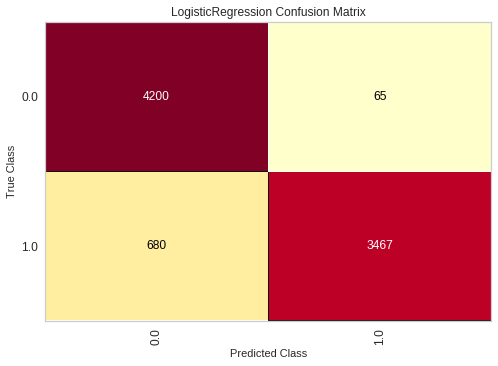

In [21]:
confusion_matrix = confusion_matrix(y_test, y_pred_test)

visualization = ConfusionMatrix(LogisticRegression())
visualization.fit(x_train, y_train)
visualization.score(x_test, y_test)
visualization.poof()
#4200+3467=7667 correct predictions
#680+65=745 incorrect predictions